In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load csv file and display head

In [2]:
df = pd.read_csv('Independent_Medical_Review__IMR__Determinations__Trend.csv')

In [3]:
df.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


In [4]:
#display three random rows
df.sample(n=3)

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
17677,MN03-2932,2003,Genitourinary/ Kidney,Incontinence,General Surgery,Gastric Bypass,Overturned Decision of Health Plan,Medical Necessity,31-40,Female,A 32-year-old female enrollee requested author...
10431,MN10-10522,2010,Central Nervous System/ Neuromuscular,Other,"Diagnostic Imaging, Screening and Testing",MRI,Overturned Decision of Health Plan,Medical Necessity,31-40,Male,A 35-year-old male enrollee has requested for ...
5248,EI13-15598,2013,Orthopedic/ Musculoskeletal,Osteoarthritis,Pharmacy/Prescription Drugs,Arthritis Medications,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Female,A 53-year-old female enrollee has requested Or...


In [5]:
df.shape

(19245, 11)

# Show all columns in dataframe

In [6]:
df.columns.values

array(['Reference ID', 'Report Year', 'Diagnosis Category',
       'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Age Range',
       'Patient Gender', 'Findings'], dtype=object)

# Checking missing values in dataframe

In [7]:
total_count = len(df)

In [8]:
missing_count = df.isnull().sum().reset_index(name='count')
missing_count

,index,count
0,Reference ID,0
1,Report Year,0
2,Diagnosis Category,59
3,Diagnosis Sub Category,1904
4,Treatment Category,450
5,Treatment Sub Category,1268
6,Determination,0
7,Type,0
8,Age Range,1210
9,Patient Gender,1210


In [9]:
missing_count['percent']= missing_count['count']/total_count *100
missing_count.columns = ['column_name','missing_count','percentage'] 
missing_count

,column_name,missing_count,percentage
0,Reference ID,0,0.000000
1,Report Year,0,0.000000
2,Diagnosis Category,59,0.306573
3,Diagnosis Sub Category,1904,9.893479
4,Treatment Category,450,2.338270
5,Treatment Sub Category,1268,6.588724
6,Determination,0,0.000000
7,Type,0,0.000000
8,Age Range,1210,6.287347
9,Patient Gender,1210,6.287347


<AxesSubplot:>

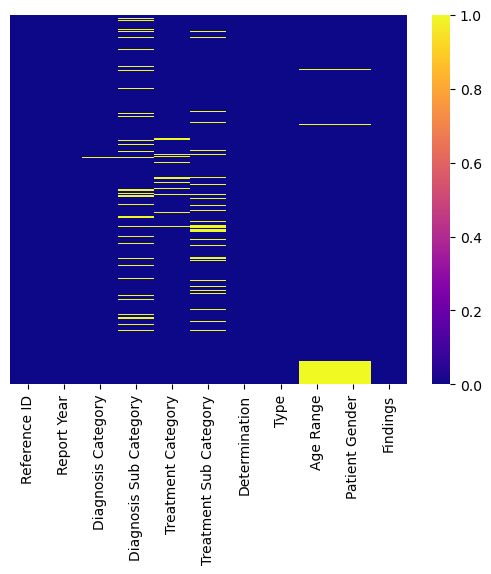

In [10]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=True,cmap = 'plasma',yticklabels = False)

In [11]:
null_df = missing_count[['column_name','percentage']]

In [12]:
null_df

,column_name,percentage
0,Reference ID,0.000000
1,Report Year,0.000000
2,Diagnosis Category,0.306573
3,Diagnosis Sub Category,9.893479
4,Treatment Category,2.338270
5,Treatment Sub Category,6.588724
6,Determination,0.000000
7,Type,0.000000
8,Age Range,6.287347
9,Patient Gender,6.287347


In [13]:
null_df.columns = ['column_name','null_value_%']

In [14]:
fig = plt.figure(figsize=(10,3))

<Figure size 1000x300 with 0 Axes>

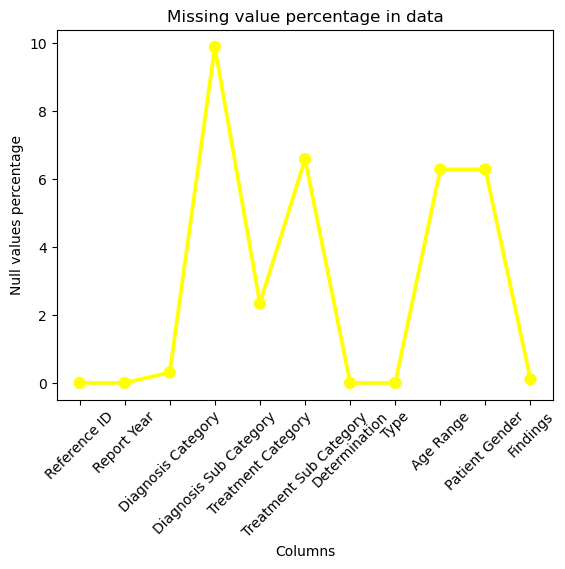

In [15]:
ax = sns.pointplot(x='column_name',y='null_value_%',data = null_df,color='yellow')
plt.xticks(rotation=45,fontsize=10)
plt.title("Missing value percentage in data")
plt.ylabel("Null values percentage")
plt.xlabel('Columns')
plt.show()

In [16]:
#checking data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          18035 non-null  object
 10  Findings                19225 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


# finding age range and gender same missing percentage

In [17]:
missing_year_gender = np.sort(df[df['Patient Gender'].isnull()]['Report Year'].unique())

In [18]:
missing_year_age = np.sort(df[df['Age Range'].isnull()]['Report Year'].unique())
missing_year_age

array([2001, 2002, 2003], dtype=int64)

### Age and gender column contains missing values for same year so will try to find out the values from fiding column

In [19]:
def find_gender(patient_info):
    gender = None
    if patient_info['Patient Gender'] in ['Male','Female']:
        gender = patient_info['Patient Gender']
    elif str(patient_info['Patient Gender']).lower() == 'nan' or str(patient_info['Patient Gender']).lower() =='None':
        findings_first_20_words = patient_info['Findings'].split(' ')[:20]
        # print(findings_first_20_words)
        for word in findings_first_20_words:
            if (re.search(r'\b(?:his|male|man)\b', word)):
                gender = 'Male'
            elif (re.search(r'\b(?:her|female|woman)\b', word)):
                gender = 'Female'
    
    return gender

In [20]:
df['Extracted Gender'] = df.apply(find_gender, axis=1)
df['Patient Gender'] = df.apply(find_gender, axis=1)
df.isnull().sum().reset_index(name='count')

,index,count
0,Reference ID,0
1,Report Year,0
2,Diagnosis Category,59
3,Diagnosis Sub Category,1904
4,Treatment Category,450
5,Treatment Sub Category,1268
6,Determination,0
7,Type,0
8,Age Range,1210
9,Patient Gender,3


### extracted patient gender information from findings and reduced missing values to 3

In [21]:
df['Age Range'].unique()

array(['41-50', '21-30', '0-10', '65+', '51-64', '11_20', '31-40', nan],
      dtype=object)

## fixing age range typo


In [22]:
def fix_age_range(patient_info):
    age_range = patient_info['Age Range']

    if age_range =='11_20':
        age_range = '11-20'

    return age_range

In [23]:
df["Age Range"] = df.apply(fix_age_range, axis=1)

In [24]:
df['Age Range'].unique()

array(['41-50', '21-30', '0-10', '65+', '51-64', '11-20', '31-40', nan],
      dtype=object)

In [25]:
row = df['Findings'][1134]

In [26]:
def extracted_age(row):
    if isinstance(row['Findings'], str):
        first_20_words = row['Findings'].split(' ')[:20]
        for word in first_20_words:
            temp_age = re.search(r'(\d{1,3})[\- ]year', word, re.IGNORECASE)
            if temp_age is not None:
                return int(temp_age.group(1))
    return np.nan

In [27]:
df['Extracted Age'] = df.apply(extracted_age, axis=1)

In [28]:
df['Extracted Age'].unique()

array([nan, 62., 36., 27., 14., 45., 59., 43., 69., 50., 17., 37., 16.,
       75., 32., 49., 58., 64., 53., 30., 39., 40., 67., 60., 57., 23.,
       63., 35., 20., 55., 68., 52., 41., 61., 29., 54., 18., 65., 42.,
       34., 51., 48., 56., 46., 19., 28., 26., 12., 44., 22., 31., 33.,
       21., 47., 66., 15., 24., 25., 70., 77., 38., 72., 78., 11., 13.,
       10., 79., 73., 82., 85., 92.,  6., 74.,  9.,  2.,  4.,  8.,  3.,
        7., 76., 71.,  5., 84., 81., 80.,  1., 91., 89., 83., 87., 86.,
       88., 90.])

In [29]:
def age_calculate(patient_info):
    age_range = patient_info['Age Range']
    extracted_age = patient_info['Extracted Age']
    if age_range != str:
        if 0 <= extracted_age <= 10:
            age_range = "0-10"
        elif 11 <= extracted_age <= 20:
            age_range = "11-20"
        elif 21 <= extracted_age <= 30:
            age_range = "21-30"
        elif 31 <= extracted_age <= 40:
            age_range = "31-40"
        elif 41 <= extracted_age <= 50:
            age_range = "41-50"
        elif 51 <= extracted_age <= 64:
            age_range = "51-64"
        elif extracted_age >= 65:
                age_range = "65+"
    return age_range

In [30]:
df["Age Range"] = df.apply(age_calculate,axis=1)

In [31]:
df.isnull().sum().reset_index(name='count')

,index,count
0,Reference ID,0
1,Report Year,0
2,Diagnosis Category,59
3,Diagnosis Sub Category,1904
4,Treatment Category,450
5,Treatment Sub Category,1268
6,Determination,0
7,Type,0
8,Age Range,72
9,Patient Gender,3


In [32]:
for i in df.columns:
    print(i,":")
    print(df[i].unique())
    print("#######")

Reference ID :
['MN16-22639' 'MN16-22638' 'MN16-22637' ... 'MN01-5' 'MN01-4' 'EI01-3']
#######
Report Year :
[2016 2006 2015 2014 2010 2005 2004 2009 2008 2007 2001 2013 2012 2002
 2003 2011]
#######
Diagnosis Category :
['Infectious' 'Mental' 'Autism Spectrum' 'Prevention/Good Health'
 'Cardiac/Circulatory' 'OB-Gyn/ Pregnancy'
 'Digestive System/ Gastrointestinal' 'Orthopedic/ Musculoskeletal'
 'Central Nervous System/ Neuromuscular' 'Endocrine/ Metabolic'
 'Pediatrics' 'Chronic Pain' 'Respiratory System' 'Cancer'
 'Morbid Obesity' 'Ears, Nose, Throat' 'Post Surgical Complication'
 'Immunologic' 'Skin' 'Not Applicable' 'Foot' 'Dental' 'Blood Related'
 'Genetic' 'Genitourinary/ Kidney' 'Vision' 'Trauma/Injuries' nan
 'Organ Failure' 'Alcohol and Drug Addiction']
#######
Diagnosis Sub Category :
['Hepatitis' 'Eating Disorder' 'Autism-PDD-NOS' nan
 'Female Breast Disorder' 'Other' 'Fracture' 'Depression - Severe'
 'Diabetes' 'Lipid Storage Disease' 'Thyroid Problems' 'Hypertension'
 'Mul

## replacing Nan values with unknown

In [33]:
df[['Diagnosis Sub Category', 'Treatment Sub Category']]= df[['Diagnosis Sub Category', 'Treatment Sub Category']].fillna('Unknown')

In [34]:
df[['Diagnosis Category', 'Treatment Category']] = df[['Diagnosis Category', 'Treatment Category']].fillna('Unknown')

In [35]:
df[['Patient Gender']] = df[['Patient Gender']].fillna('Unknown')

In [36]:
df[['Age Range']] = df[['Age Range']].fillna('Unknown')

In [37]:
df.isnull().sum().reset_index(name='count')

,index,count
0,Reference ID,0
1,Report Year,0
2,Diagnosis Category,0
3,Diagnosis Sub Category,0
4,Treatment Category,0
5,Treatment Sub Category,0
6,Determination,0
7,Type,0
8,Age Range,0
9,Patient Gender,0


In [38]:
df = df.drop(['Extracted Gender','Extracted Age'],axis=1)

In [39]:
df

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,Unknown,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,Unknown,Cardio Vascular,Unknown,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...
...,...,...,...,...,...,...,...,...,...,...,...
19240,MN01-7,2001,Trauma/Injuries,Gunshot Wound,Neurosugery,Cranioplasty,Overturned Decision of Health Plan,Medical Necessity,11-20,Male,The parents of a 17-year-old male requested a ...
19241,MN01-6,2001,Infectious,Onychomycosis/ Nail Fungus,Pharmacy/Prescription Drugs,Anti-Fungal,Upheld Decision of Health Plan,Medical Necessity,41-50,Male,A 46-year-old male requested Penlac lacquer fo...
19242,MN01-5,2001,Orthopedic/ Musculoskeletal,Other,Orthopedic,Arthroscopy,Upheld Decision of Health Plan,Medical Necessity,41-50,Female,A 46-year-old female requested an orthoscopic ...
19243,MN01-4,2001,Orthopedic/ Musculoskeletal,Back Pain,Reconstructive/Plastic Surgery,Breast Reduction,Overturned Decision of Health Plan,Medical Necessity,21-30,Female,A 24-year-old female requested a bilateral bre...


## check uplicate data

In [40]:
duplicate_data = df.duplicated()

In [41]:
if duplicate_data.any():
    print('duplicate data found')
else:
    print("There is no duplicate data")

There is no duplicate data


In [42]:
duplicated_data = pd.DataFrame(df.loc[df.duplicated()].count())
duplicated_data.columns = ['duplicate_total']
duplicated_data

,duplicate_total
Reference ID,0
Report Year,0
Diagnosis Category,0
Diagnosis Sub Category,0
Treatment Category,0
Treatment Sub Category,0
Determination,0
Type,0
Age Range,0
Patient Gender,0


# Bar chart visualization for categorical variable

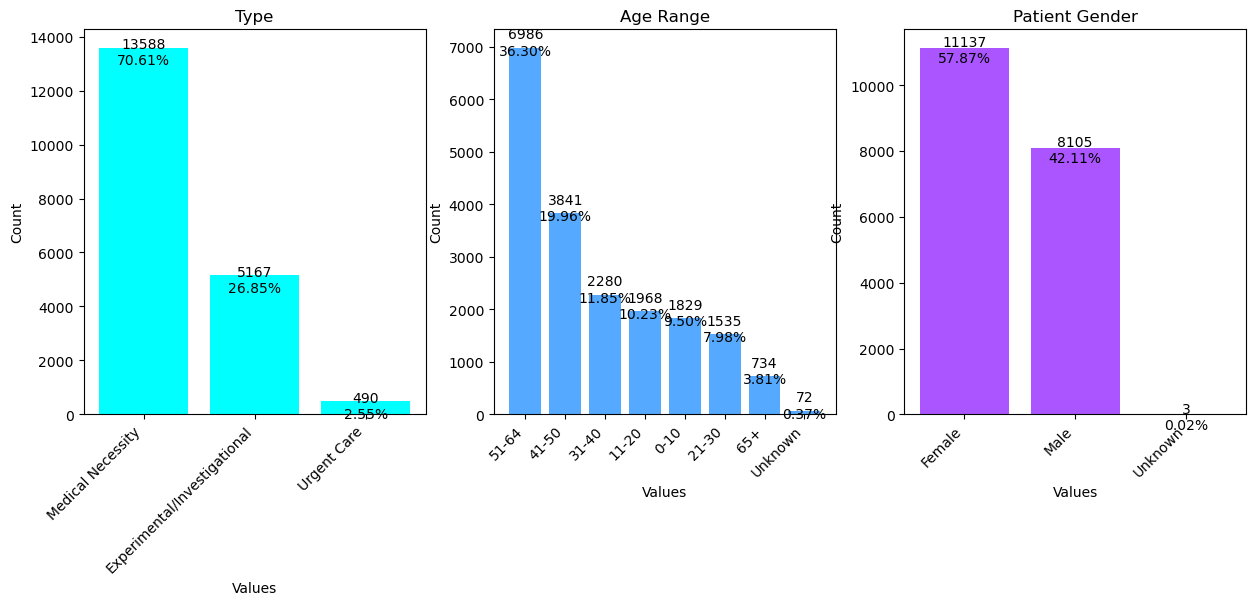

In [43]:
# listing categorical variables columns
cate_columns = ['Type','Age Range','Patient Gender']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cmap = plt.cm.get_cmap('cool')

# looping through each columns

for i, col in enumerate(cate_columns):
    # group the data by column and counting the number of occurances of each value
    counts = df[col].value_counts()
    #total rows
    total_rows = len(df)
    #percentage of each rows
    percent = (counts/total_rows) *100
    #creating bar in corresponding subplot
    axs[i].bar(counts.index,counts.values,color=cmap(i/len(cate_columns)))
    axs[i].set_title(col)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Count')

    #rotate the x axis label
    plt.setp(axs[i].get_xticklabels(),rotation=45,ha='right')

    #adding annotation on each bar
    for j, count in enumerate(counts):
        pc = percent[j]
        axs[i].text(counts.index[j],count + 0.02 * total_rows, f'{count}\n{pc:.2f}%',ha='center', va='top')

#show plot
plt.show()

# Show genderwise distribution

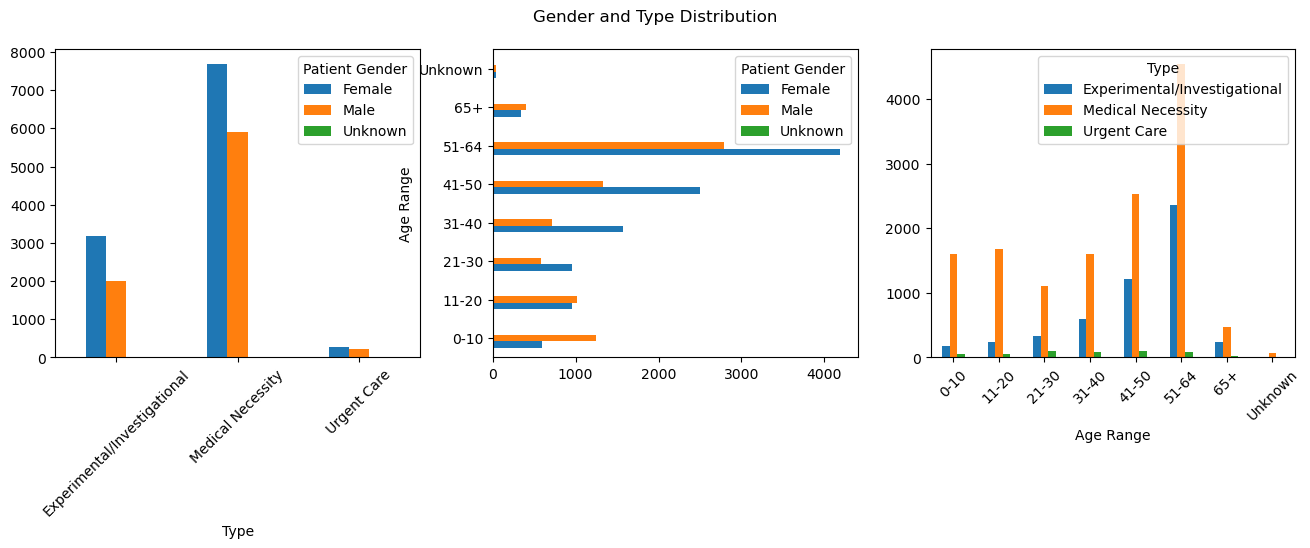

In [44]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,4)

fig.suptitle('Gender and Type Distribution')

d = df.groupby([ 'Type','Patient Gender']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0],rot=45,fontsize=10)

d = df.groupby(['Age Range','Patient Gender']).size()
p = d.unstack(level=1).plot(kind='barh', ax=ax[1],fontsize=10)

d = df.groupby(['Age Range','Type',]).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2],rot=45,fontsize=10)

## Analyzing diagnosis, treatment, patient gender and age range

In [45]:
year_wise_request_by_age = df.groupby(['Report Year','Age Range']).size().reset_index(name = "Number of request")

In [46]:
year_wise_request_by_age.columns = ['Report Year','Category','Number of request']

In [47]:
year_wise_request_by_age

,Report Year,Category,Number of request
0,2001,0-10,32
1,2001,11-20,33
2,2001,21-30,33
3,2001,31-40,95
4,2001,41-50,153
...,...,...,...
109,2016,21-30,107
110,2016,31-40,131
111,2016,41-50,235
112,2016,51-64,611


In [48]:
year_wise_request_by_gender = df.groupby(['Report Year','Patient Gender']).size().reset_index(name = "Number of request")

In [49]:
year_wise_request_by_gender.columns = ['Report Year','Category','Number of request']

In [50]:
year_wise_request_by_gender 

,Report Year,Category,Number of request
0,2001,Female,327
1,2001,Male,223
2,2001,Unknown,1
3,2002,Female,429
4,2002,Male,260
5,2002,Unknown,2
6,2003,Female,458
7,2003,Male,281
8,2004,Female,504
9,2004,Male,274


In [51]:
year_wise_request_by_type= df.groupby(['Report Year','Type']).size().reset_index(name = "Number of request")

In [52]:
year_wise_request_by_type

,Report Year,Type,Number of request
0,2001,Experimental/Investigational,144
1,2001,Medical Necessity,407
2,2002,Experimental/Investigational,135
3,2002,Medical Necessity,554
4,2002,Urgent Care,2
5,2003,Experimental/Investigational,147
6,2003,Medical Necessity,592
7,2004,Experimental/Investigational,131
8,2004,Medical Necessity,647
9,2005,Experimental/Investigational,214


In [53]:
year_wise_request_by_type.columns = ['Report Year','Category','Number of request']

In [54]:
year_wise_request_by_type

,Report Year,Category,Number of request
0,2001,Experimental/Investigational,144
1,2001,Medical Necessity,407
2,2002,Experimental/Investigational,135
3,2002,Medical Necessity,554
4,2002,Urgent Care,2
5,2003,Experimental/Investigational,147
6,2003,Medical Necessity,592
7,2004,Experimental/Investigational,131
8,2004,Medical Necessity,647
9,2005,Experimental/Investigational,214


### function to generate plots based on report year

In [55]:
import plotly.express as px

In [56]:
def plot_graph(temp_df, title):
    hover_data = {
        'Report Year': True,
        'Number of request': True,
        'Category': True
    }
    
    fig = px.line(temp_df, x= 'Report Year',y = 'Number of request',color= 'Category',hover_data= hover_data, markers=True)

    fig.update_layout(title = title)

    return fig

In [57]:
data = [year_wise_request_by_age, year_wise_request_by_gender, year_wise_request_by_type]

In [58]:
year_wise_request_by_age

,Report Year,Category,Number of request
0,2001,0-10,32
1,2001,11-20,33
2,2001,21-30,33
3,2001,31-40,95
4,2001,41-50,153
...,...,...,...
109,2016,21-30,107
110,2016,31-40,131
111,2016,41-50,235
112,2016,51-64,611


In [59]:
titles = ['Requests by age','Requests by gender','Requests by type']

In [60]:
figures = []
for data, titles  in zip(data,titles):
    fig =plot_graph(data,titles)
    figures.append(fig)

for fig in figures:
    fig.show()

### Observation
#### There is spike in number of request for year 2015 
#### for age group 51-64 there is high number of requests 
#### females has more number of requests than male


In [61]:
count_diagnosis_by_year = df.groupby('Report Year')['Diagnosis Category'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Diagnosis Category')

In [62]:
max_diagnosis_count = df.groupby(['Report Year', 'Diagnosis Category']).size().groupby('Report Year').max().reset_index(name='Diagnosis Count')

In [63]:
max_diagnosis_count

,Report Year,Diagnosis Count
0,2001,122
1,2002,123
2,2003,130
3,2004,118
4,2005,192
5,2006,213
6,2007,269
7,2008,291
8,2009,294
9,2010,252


In [64]:
# Merge the column
diagnosis_count_by_year = count_diagnosis_by_year.merge(max_diagnosis_count, on='Report Year')


In [65]:
# Sort the data by "Report Year"
diagnosis_count_by_year = diagnosis_count_by_year.sort_values('Report Year')
diagnosis_count_by_year

,Report Year,Diagnosis Category,Diagnosis Count
0,2001,Orthopedic/ Musculoskeletal,122
1,2002,Orthopedic/ Musculoskeletal,123
2,2003,Orthopedic/ Musculoskeletal,130
3,2004,Orthopedic/ Musculoskeletal,118
4,2005,Orthopedic/ Musculoskeletal,192
5,2006,Orthopedic/ Musculoskeletal,213
6,2007,Orthopedic/ Musculoskeletal,269
7,2008,Orthopedic/ Musculoskeletal,291
8,2009,Orthopedic/ Musculoskeletal,294
9,2010,Orthopedic/ Musculoskeletal,252


#### from 2001 to 2013 most request comes from orthopedic diagnosis category. In 2014 that changes to Mental diagnosis category and in 2015 and 2016 infectious diagnosis category IMR were most requested.

#### Visualize diagnosis data

In [66]:
fig = px.pie(diagnosis_count_by_year,values = 'Diagnosis Count', names='Diagnosis Category',title = "Diagnosis count by year")

fig.update_traces(textposition ='inside',textinfo = 'percent',hovertemplate ='Year:%{customdata}')

fig.update_traces(customdata=diagnosis_count_by_year['Report Year'])
fig.show()

### diagnosis category analysis by gender

In [67]:
len_df = len(df)

diagnosis_count_male = df[df['Patient Gender']=='Male']['Diagnosis Category'].value_counts().reset_index(name ='male count')

diagnosis_count_male

diagnosis_count_female = df[df['Patient Gender']=='Female']['Diagnosis Category'].value_counts().reset_index(name ='female count')

diagnosis_count_female

,index,female count
0,Orthopedic/ Musculoskeletal,2037
1,Mental,1392
2,Central Nervous System/ Neuromuscular,1008
3,Cancer,929
4,OB-Gyn/ Pregnancy,800
5,Morbid Obesity,701
6,Cardiac/Circulatory,485
7,Infectious,483
8,Digestive System/ Gastrointestinal,458
9,Endocrine/ Metabolic,361


In [68]:
diagnosis_count_male['Male percent'] = diagnosis_count_male['male count']/len_df *100

diagnosis_count_female['Female percent'] = diagnosis_count_female['female count']/len_df *100

diagnosis_count_male

,index,male count,Male percent
0,Orthopedic/ Musculoskeletal,1431,7.435698
1,Mental,1120,5.819693
2,Cancer,752,3.907508
3,Central Nervous System/ Neuromuscular,612,3.180047
4,Infectious,576,2.992985
5,Cardiac/Circulatory,480,2.494154
6,Pediatrics,447,2.322681
7,Autism Spectrum,429,2.229150
8,Endocrine/ Metabolic,418,2.171993
9,Digestive System/ Gastrointestinal,300,1.558846


In [69]:
diagnosis_percent = diagnosis_count_female.merge(diagnosis_count_male)

In [70]:
diagnosis_percent

,index,female count,Female percent,male count,Male percent
0,Orthopedic/ Musculoskeletal,2037,10.584567,1431,7.435698
1,Mental,1392,7.233048,1120,5.819693
2,Central Nervous System/ Neuromuscular,1008,5.237724,612,3.180047
3,Cancer,929,4.827228,752,3.907508
4,OB-Gyn/ Pregnancy,800,4.156924,1,0.005196
5,Morbid Obesity,701,3.642505,123,0.639127
6,Cardiac/Circulatory,485,2.520135,480,2.494154
7,Infectious,483,2.509743,576,2.992985
8,Digestive System/ Gastrointestinal,458,2.379839,300,1.558846
9,Endocrine/ Metabolic,361,1.875812,418,2.171993


In [71]:
diagnosis_percent = diagnosis_percent.rename(columns={'index':'Diagnosis Category'})

In [72]:
diagnosis_percent = diagnosis_percent.head(10)
diagnosis_percent

,Diagnosis Category,female count,Female percent,male count,Male percent
0,Orthopedic/ Musculoskeletal,2037,10.584567,1431,7.435698
1,Mental,1392,7.233048,1120,5.819693
2,Central Nervous System/ Neuromuscular,1008,5.237724,612,3.180047
3,Cancer,929,4.827228,752,3.907508
4,OB-Gyn/ Pregnancy,800,4.156924,1,0.005196
5,Morbid Obesity,701,3.642505,123,0.639127
6,Cardiac/Circulatory,485,2.520135,480,2.494154
7,Infectious,483,2.509743,576,2.992985
8,Digestive System/ Gastrointestinal,458,2.379839,300,1.558846
9,Endocrine/ Metabolic,361,1.875812,418,2.171993


In [73]:
fig = px.bar(diagnosis_percent,x=['male count','female count'], y='Diagnosis Category', orientation= 'h', text_auto=True)
fig.update_layout(title_text ="Diagnosis count by patiet gender")
fig.show()

for both male and female orthopedic diagnoasis category request are high followed by mental diagosis category

#### Analyzing diagnosis sub category by gender

In [81]:
en_df = len(df)

diagnosis_sub_cat_count_male = df[df['Patient Gender']=='Male']['Diagnosis Sub Category'].value_counts().reset_index(name ='male count')

diagnosis_sub_cat_count_male

diagnosis_sub_cat_count_female = df[df['Patient Gender']=='Female']['Diagnosis Sub Category'].value_counts().reset_index(name ='female count')

diagnosis_sub_cat_count_female

,index,female count
0,Other,2399
1,Unknown,1293
2,Back Pain,427
3,Breast Cancer,400
4,Hepatitis,336
...,...,...
251,Pyelonephritis,1
252,Burn,1
253,Tourettes Syndrom,1
254,Malaria,1


In [82]:
diagnosis_sub_cat_count_male['Male percent'] = diagnosis_sub_cat_count_male['male count']/len_df *100

diagnosis_sub_cat_count_female['Female percent'] = diagnosis_sub_cat_count_female['female count']/len_df *100

diagnosis_sub_cat_count_male

,index,male count,Male percent
0,Other,1592,8.272279
1,Unknown,611,3.174851
2,Hepatitis,455,2.364250
3,Autism-PDD-NOS,364,1.891400
4,Back Pain,261,1.356196
...,...,...,...
236,Gallstones,1,0.005196
237,Nasal Polyps,1,0.005196
238,Malaria,1,0.005196
239,Gastritis,1,0.005196


In [83]:
diagnosis_sub_cat_percent = diagnosis_count_female.merge(diagnosis_count_male)

In [86]:
diagnosis_sub_cat_percent = diagnosis_sub_cat_percent.rename(columns={'index':'Diagnosis sub category'})
diagnosis_sub_cat_percent = diagnosis_sub_cat_percent.head(10)
diagnosis_sub_cat_percent

,Diagnosis sub category,female count,Female percent,male count,Male percent
0,Other,2399,12.465575,1592,8.272279
1,Unknown,1293,6.718628,611,3.174851
2,Back Pain,427,2.218758,261,1.356196
3,Breast Cancer,400,2.078462,4,0.020785
4,Hepatitis,336,1.745908,455,2.364250
5,Eating Disorder,290,1.506885,15,0.077942
6,Female Breast Disorder,273,1.418550,1,0.005196
7,Vertebral Disc Problem,248,1.288646,229,1.189919
8,Depression - Severe,205,1.065212,88,0.457262
9,Osteoarthritis,204,1.060016,142,0.737854


for both male and female other and unknown are mostly listed sub category. Apart from other and unknown sub category, most female IMR are observed for backpain and breast cancer subcategory. Also for male patients most IMR for hepatitis and back pain sub category

#### Analyzing issue for male patient in pregnancy category

In [88]:
issue_male_dia_cat = df.loc[(df['Patient Gender']=='Male') & (df['Diagnosis Category']=='OB-Gyn/ Pregnancy')]['Findings']
print(issue_male_dia_cat.iloc[0])

Nature of Statutory Criteria/Case Summary: An enrollee has requested breast tomosynthesis for evaluation of his medical condition.   Findings: Two physician reviewers found that the addition of digital breast tomosynthesis reduces false positives and increases cancer detection when compared to two dimensional full field digital mammography alone.  Three dimensional digital breast tomosynthesis allows for separation of structures to differentiate architectural distortion from masses and overlapping fibroglandular tissue.  Given this support, the addition of tomosynthesis to the usual two dimensional protocol was likely of greater benefit to this patient than had the exam been done with two dimensional imaging alone.  Accordingly, breast tomosynthesis  was likely to be more beneficial for evaluation of the patient’s medical condition than any available standard therapy.   Final Result: Two reviewers determined that the services at issue were likely to be more beneficial for evaluation of

patient is incorrectly listed in pregnecy category instead should be listed under cancer category as patient was diagnost with breast cancer

#### Analyzing diagnosis category by age range

In [89]:
diagnosis_count_by_age = df.groupby('Age Range')['Diagnosis Category'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Diagnosis Category')
max_diagnosis_count_by_age = df.groupby(['Age Range', 'Diagnosis Category']).size().groupby('Age Range').max().reset_index(name='Diagnosis Count')

In [90]:
diagnosis_count_by_age = diagnosis_count_by_age.merge(max_diagnosis_count_by_age, on='Age Range')

In [91]:
diagnosis_count_by_age = diagnosis_count_by_age.sort_values('Age Range')
diagnosis_count_by_age

,Age Range,Diagnosis Category,Diagnosis Count
0,0-10,Pediatrics,628
1,11-20,Mental,859
2,21-30,Mental,442
3,31-40,Orthopedic/ Musculoskeletal,437
4,41-50,Orthopedic/ Musculoskeletal,891
5,51-64,Orthopedic/ Musculoskeletal,1529
6,65+,Orthopedic/ Musculoskeletal,175
7,Unknown,Orthopedic/ Musculoskeletal,14
